The following block imports necessary libraries and loads the data.                                                                         
After the following block of code has been run, the data dataframe will contain all the customer information in 72 features for every customer present in the original training dataset with fecha_dato = '2016-05-28' (last month present in the original training dataset). The test_data dataframe will contain all the customer information, excluding the 24 target columns. The index of both datasets is the ncodpers feature of the original training and testing datasets (however the ncodpers feature is also present in both datasets, as it will be used later)


In [64]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

#load part of the data (all months)
#features #2-#24 will only be loaded from the last month present in the dataset
data = pd.read_csv("train_ver2.csv", index_col = 'ncodpers', usecols = ['fecha_dato', 'ncodpers', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'])
last_month = 1
last_year = 2015
last_date = str(last_year)+"-0"+str(last_month)+"-28"
month = 2
year = 2015
date = str(year)+"-0"+str(month)+"-28"

#load two first months into two separate dataframes
last_data = data.loc[data['fecha_dato'] == last_date]
current_data = data.loc[data['fecha_dato'] == date]

#create new features in the latest month between the two
for col, col_data in current_data.iteritems():
    if col != 'fecha_dato':
        new_col_name = str(col)+"_hist"
        current_data[new_col_name] = last_data[col] + current_data[col]
        current_data[new_col_name].fillna(current_data[col], inplace=True)


#load every following month up until the 5th of 2016, updating the created features on each iteration
for x in range(0,15):
    last_data = current_data 
    month = month + 1
    if month > 12:
        year = year + 1
        month = month - 12
    if month < 10:
        date = str(year)+"-0"+str(month)+"-28"
    else:
        date = str(year)+"-"+str(month)+"-28"
    print date
    current_data = data.loc[data['fecha_dato'] == date]
    
    
    for col, col_data in last_data.iteritems():
        if col[-4:] == 'hist':
            col_name = col[:-5]
            current_data[col] = last_data[col]*current_data[col_name] + current_data[col_name]
            current_data[col].fillna(current_data[col_name], inplace=True)

#load the training set once more to get the information that was not loaded the first time (columns #2 - #24)
#Only the last month is needed this time
data = pd.read_csv("train_ver2.csv", index_col = 'ncodpers', skiprows  =  (1,8000000))


temp_data = data.loc[data['fecha_dato'] == '2016-05-28']

#the new information is copied onto the dataframe that was previously created
for col, col_data in temp_data.iteritems():
    current_data[col] = temp_data[col]
    if col[-4:] == 'ult1':
        col_name = str(col)+"_hist"
        current_data[col_name] = current_data[col_name]*current_data[col] + current_data[col]

#my updated dataframe is loaded onto the data variable    
data = current_data

#the testing set is loaded and updated to include the new features
test_data = pd.read_csv("test_ver2.csv", index_col = 'ncodpers')
for col, col_data in last_data.iteritems():
        if col[-4:] == 'hist':
            col_name = col[:-5]
            test_data[col] = data[col]
            #test_data[col] = test_data[col] + (data[col] > 0)
            test_data[col_name] = last_data[col_name] #target columns


#some last new features are added to both the testing and training set
data['ncodpers'] = data.index
test_data['ncodpers'] = test_data.index
data['total'] = 0
for col, col_data in data.iteritems():
    if col[-4:] == 'ult1':
        data['total'] = data['total'] + data[col]
test_data['total'] = data['total']

#deleting some variables that won't be used again
del current_data
del last_data
del temp_data

#Rearranging columns so that target variables are at the end. 
#This code block should be run only once.
cols = data.columns.tolist()

cols = cols[:1] + cols[-2:] + cols[49:-2] + cols[25:49] + cols[1:25] #column list rearranged

data = data[cols]
cols = cols[:49] #target variables removed from column list
test_data = test_data[cols]


C:\Users\Stergiadis\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015-03-28


C:\Users\Stergiadis\Anaconda2\lib\site-packages\ipykernel\__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015-04-28
2015-05-28
2015-06-28
2015-07-28
2015-08-28
2015-09-28
2015-10-28
2015-11-28
2015-12-28
2016-01-28
2016-02-28
2016-03-28
2016-04-28
2016-05-28


# Data exploration and cleaning

Conclusions drawn from this segment are analysed in the project report.

In [38]:
#print number of samples in each dataset, as well as number of mutual samples 
print "5th month (last month of the training set) dataset  has {} samples with {} features each.".format(*data.shape)
print "6th month dataset (test set) has {} samples with {} features each.".format(*test_data.shape)
unique_ids   = pd.Series(data["ncodpers"].unique())
last_unique_ids = pd.Series(test_data["ncodpers"].unique())
mutual_ids = set(unique_ids).intersection(last_unique_ids)
print "Number of samples that are present in both datasets is:",len(mutual_ids)

5th month (last month of the training set) dataset  has 931453 samples with 73 features each.
6th month dataset (test set) has 929615 samples with 49 features each.
Number of samples that are present in both datasets is: 929615


In [39]:
# Create a DataFrame of the chosen samples
indices = [1050619, 1375586, 1050589, 1050598, 538048, 538018, 538036, 538034, 538029, 538031]
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)


Chosen samples of wholesale customers dataset:


,fecha_dato,ncodpers,total,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,1050619,1.0,N,ES,H,25,2012-08-10,0.0,45,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2016-05-28,1375586,2.0,N,ES,H,36,2015-01-12,0.0,16,...,0,0,0,0,0,0,0,0.0,0.0,1
2,2016-05-28,1050589,1.0,N,ES,V,23,2012-08-10,0.0,45,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2016-05-28,1050598,1.0,N,ES,H,24,2012-08-10,0.0,45,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2016-05-28,538048,2.0,N,ES,H,64,2007-04-18,0.0,109,...,0,0,0,1,0,0,0,0.0,0.0,0
5,2016-05-28,538018,4.0,N,ES,H,51,2005-06-20,0.0,131,...,0,0,0,0,0,0,0,0.0,0.0,1
6,2016-05-28,538036,0.0,N,ES,H,41,2005-06-20,0.0,131,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2016-05-28,538034,1.0,N,ES,V,48,2005-06-20,0.0,131,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2016-05-28,538029,2.0,N,ES,H,21,2005-06-20,0.0,131,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2016-05-28,538031,1.0,N,ES,V,18,2005-06-20,0.0,131,...,0,0,0,0,0,0,0,0.0,0.0,0


In [40]:
(data.isnull().sum()/len(data)).sort_values() #percentage of missing values


fecha_dato                0.000000
ind_cco_fin_ult1          0.000000
ind_aval_fin_ult1         0.000000
ind_ahor_fin_ult1         0.000000
ind_recibo_ult1_hist      0.000000
ind_nom_pens_ult1_hist    0.000000
ind_nomina_ult1_hist      0.000000
ind_cder_fin_ult1         0.000000
ind_viv_fin_ult1_hist     0.000000
ind_tjcr_fin_ult1_hist    0.000000
ind_reca_fin_ult1_hist    0.000000
ind_pres_fin_ult1_hist    0.000000
ind_plan_fin_ult1_hist    0.000000
ind_hip_fin_ult1_hist     0.000000
ind_fond_fin_ult1_hist    0.000000
ind_valo_fin_ult1_hist    0.000000
ind_cno_fin_ult1          0.000000
ind_ctju_fin_ult1         0.000000
ind_ctma_fin_ult1         0.000000
ind_nomina_ult1           0.000000
ind_viv_fin_ult1          0.000000
ind_valo_fin_ult1         0.000000
ind_tjcr_fin_ult1         0.000000
ind_reca_fin_ult1         0.000000
ind_pres_fin_ult1         0.000000
ind_plan_fin_ult1         0.000000
ind_hip_fin_ult1          0.000000
ind_fond_fin_ult1         0.000000
ind_ecue_fin_ult1   

In [41]:
# Display a description of the dataset
display(data.describe())

,ncodpers,total,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1_hist,ind_aval_fin_ult1_hist,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,9.314530e+05,931453.000000,931453.000000,931453.000000,931453.0,927461.000000,931453.000000,7.024350e+05,931453.000000,931453.000000,...,931453.000000,931453.000000,931453.000000,931453.000000,931453.000000,931453.000000,931453.000000,931453.000000,931453.000000,931453.000000
mean,8.799972e+05,1.331831,0.036890,1.196746,1.0,26.545903,0.424845,1.340896e+05,0.001489,0.000291,...,0.004861,0.007901,0.002138,0.048886,0.037385,0.023003,0.003177,0.051864,0.056737,0.121370
std,4.483382e+05,1.479452,0.188491,4.386622,0.0,12.836681,0.494320,2.322205e+05,0.163550,0.071253,...,0.069553,0.088533,0.046184,0.215630,0.189702,0.149912,0.056273,0.221753,0.231340,0.326556
min,1.588900e+04,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.837490e+05,0.000000,0.000000,1.000000,1.0,15.000000,0.000000,6.849379e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.668510e+05,1.000000,0.000000,1.000000,1.0,28.000000,0.000000,1.014934e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.265166e+06,2.000000,0.000000,1.000000,1.0,35.000000,1.000000,1.555464e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.553689e+06,15.000000,1.000000,99.000000,1.0,52.000000,1.000000,2.889440e+07,18.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above description of the data isn't very helpful. Firstly, there are a lot of missing values, resulting in a NaN value for the percentiles of most features. Moreover, a lot of the features take on numerical values but are in reality labels: for example the indrel feature can take on two values: 1 meaning that the sample was a primary customer at the end of the month or 99 meaning the opposite. For such features, the information provided by the describe function won't offer any valuable insight. Perhaps it would be more helpful if I used it on a dataset with categorical features removed and missing values filled in.

In [42]:
for col in data:
    print col
    print data[col].value_counts()



fecha_dato
2016-05-28    931453
Name: fecha_dato, dtype: int64
ncodpers
18423      1
1312725    1
1384438    1
1378293    1
1380340    1
1390579    1
1388528    1
1433582    1
1427437    1
1429484    1
1439723    1
1441770    1
1437672    1
1417190    1
1411045    1
1423331    1
1425378    1
1419233    1
1333215    1
1335262    1
1329117    1
1331164    1
1341403    1
1343450    1
1337305    1
1339352    1
1316823    1
1382391    1
1404920    1
1402873    1
          ..
891673     1
998221     1
1037136    1
969587     1
949093     1
967538     1
973681     1
971632     1
928623     1
926574     1
930668     1
920427     1
918378     1
924521     1
922472     1
942950     1
940897     1
1035091    1
938848     1
1026911    1
1024862    1
1031005    1
1018715    1
1016666    1
1022809    1
1020760    1
1043287    1
1041238    1
1045332    1
26637      1
Name: ncodpers, dtype: int64
total
1.0     452986
0.0     234914
2.0     120532
3.0      47813
4.0      28767
5.0      18046
6.0      1

# Visualization


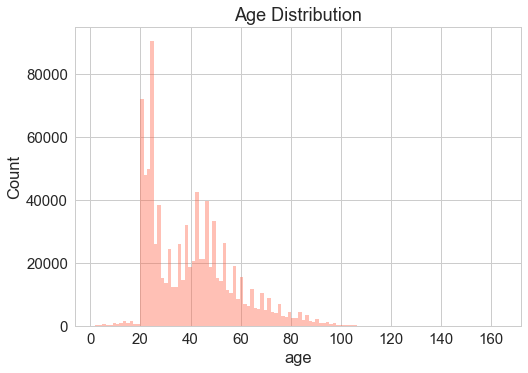

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["age"].dropna(),
                 bins=len(data['age'].unique()),
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

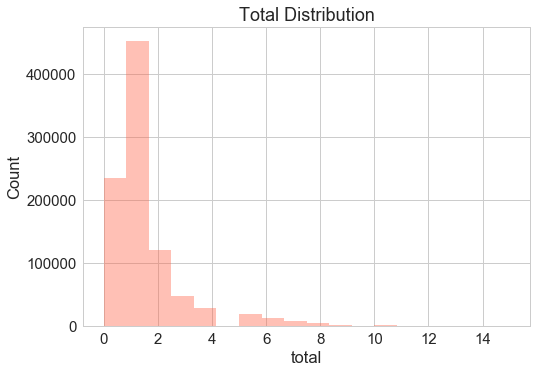

In [7]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(data["total"].dropna(),
                 bins=18,
                 kde=False,
                 color="tomato")
    sns.plt.title("Total Distribution")
    plt.ylabel("Count")

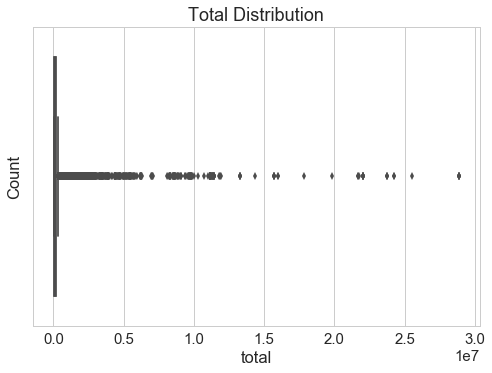

In [5]:
#boxplot for renta feature
sns.boxplot(data.renta.values)
plt.show()


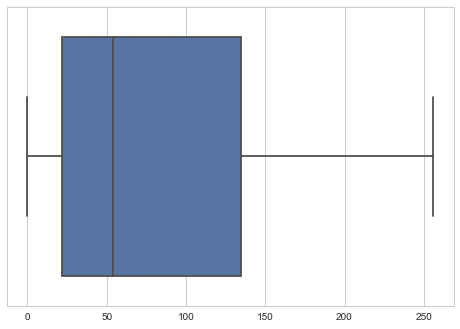

In [56]:
#boxplof for antiguedad feature
sns.boxplot(data.antiguedad.values)
plt.show()

In [47]:
incomes = data.loc[data.renta.notnull(),:].groupby("total").agg({"renta":{"MedianIncome":np.mean}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.total = incomes.total.astype("category", categories=[i for i in data.total.unique()],ordered=False)


([<matplotlib.axis.YTick at 0x223714be0>,
 <a list of 6 Text yticklabel objects>)

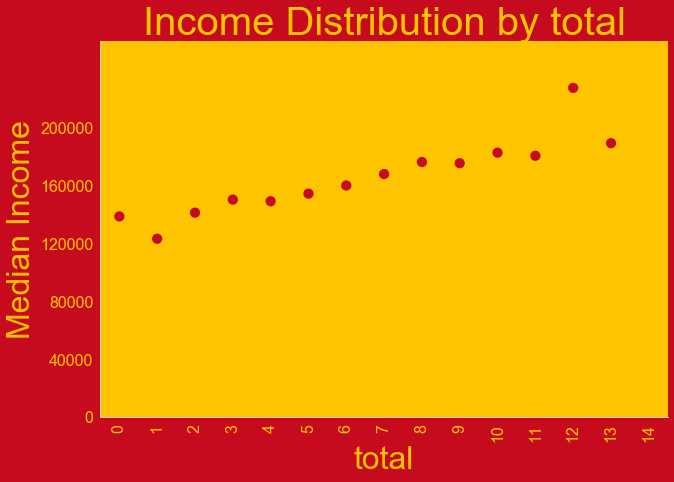

In [48]:
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.factorplot(data=incomes,
                   x="total",
                   y=("renta","MedianIncome"),
                   order=(i for i in range(15)),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   color="#c60b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16,labelcolor="#ffc400")#
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("total",size=32,color="#ffc400")
plt.title("Income Distribution by total",size=40,color="#ffc400")
plt.ylim(0,260000)
plt.yticks(range(0,220000,40000))

# Preprocessing

In [65]:
#some numerical features that were loaded as strings are converted to numeric types.
data['age'] = data['age'].apply(pd.to_numeric)
test_data['age'] = test_data['age'].apply(pd.to_numeric)
data['antiguedad'] = data['antiguedad'].apply(pd.to_numeric)
test_data['antiguedad'] = test_data['antiguedad'].apply(pd.to_numeric)
test_data['renta'] = pd.to_numeric(test_data['renta'], errors = 'coerce')

In [66]:
#drop features that aren't helpful
data.drop('conyuemp', axis=1, inplace=True) 
data.drop('tipodom', axis=1, inplace=True) 
data.drop('cod_prov', axis=1, inplace=True)
test_data.drop('conyuemp', axis=1, inplace=True) 
test_data.drop('tipodom', axis=1, inplace=True) 
test_data.drop('cod_prov', axis=1, inplace=True) 



In [67]:
#replace values that should not exist with what they were supposed to be, or with a median of the feature
data['indrel_1mes'].replace(to_replace = [1.0, '1.0', '1', 3.0, '3.0', '3', 'P', '2', '2.0', 2.0, 4.0, '4.0', '4'], value = [1, 1, 1, 3, 3, 3, 'P', 2, 2, 2, 4, 4, 4], inplace = True)
data['antiguedad'].replace(to_replace = -999999, value = data['antiguedad'].median(), inplace = True)
test_data['antiguedad'].replace(to_replace = -999999, value = test_data['antiguedad'].median(), inplace = True)

In [68]:
#replace some 'pais_residencia' values that aren't present in the training set with the most common 'pais_residencia' value
test_data['pais_residencia'].replace(to_replace = ['CH', 'GB', 'BE', 'DJ', 'IE', 'QA', 'US', 'VE', 'DO', 'SE', 'AR', 'CA', 'PL',
 'CN', 'CM', 'FR', 'AT', 'RO', 'LU', 'PT', 'CL', 'MR', 'MX', 'SN', 'BR', 'CO', 'PE',
 'RU', 'LT', 'EE', 'MA', 'HN', 'BG', 'NO', 'GT', 'UA', 'NL', 'GA', 'IL', 'JP', 'EC', 'IN',
 'DZ', 'ET', 'SA', 'HU', 'JM', 'CI', 'CU', 'TG', 'TN', 'NG', 'AU', 'GR', 'DK', 'LB',
 'UY', 'TH', 'SG', 'MD', 'SK', 'AD', 'BY', 'HK', 'HR', 'EG', 'GQ', 'PR', 'ZA', 'PA', 'KE',
 'TR', 'FI', 'BA', 'SV', 'PK', 'KR', 'AO', 'GN', 'IS', 'TW', 'MK', 'VN', 'CZ', 'CR',
 'MZ', 'MT' ,'LY' ,'GH' ,'KH' ,'AE', 'RS', 'OM', 'GE', 'NI', 'GI', 'NZ', 'MM', 'PH', 'KW',
 'BM', 'CG', 'ML', 'AL', 'ZW', 'CF', 'GM', 'CD', 'BZ', 'KZ', 'GW', 'SL', 'LV'], value = 'ES', inplace = True)

In [69]:
#handling outliers in the 'age' column
data.loc[data.age < 18,"age"]  = data.loc[(data.age >= 18) & (data.age <= 30),"age"].median(skipna=True)
data.loc[data.age > 100,"age"] = data.loc[(data.age >= 30) & (data.age <= 100),"age"].median(skipna=True)
test_data.loc[test_data.age < 18,"age"]  = test_data.loc[(test_data.age >= 18) & (test_data.age <= 30),"age"].median(skipna=True)
test_data.loc[test_data.age > 100,"age"] = test_data.loc[(test_data.age >= 35) & (test_data.age <= 60),"age"].median(skipna=True)


In [70]:
import datetime

#do the conversions for ult_fec_cli_1t and fecha_alta (features that represent dates and are in string format)
data['ult_fec_cli_1t'] = np.where(data['indrel'] == 1, '2016-06-28', data["fecha_alta"])
test_data['ult_fec_cli_1t'] = np.where(test_data['indrel'] == 1, '2016-06-28', test_data["fecha_alta"])


data["fecha_alta"] = pd.to_datetime(data["fecha_alta"],format="%Y-%m-%d")
test_data["fecha_alta"] = pd.to_datetime(test_data["fecha_alta"],format="%Y-%m-%d")
data["fecha_alta"] = (2016 - pd.DatetimeIndex(data["fecha_alta"]).year)*12 + (6 - pd.DatetimeIndex(data["fecha_alta"]).month)
test_data["fecha_alta"] = (2016 - pd.DatetimeIndex(test_data["fecha_alta"]).year)*12 + (6 - pd.DatetimeIndex(test_data["fecha_alta"]).month)


data["ult_fec_cli_1t"] = pd.to_datetime(data["ult_fec_cli_1t"],format="%Y-%m-%d")
data["ult_fec_cli_1t"] = (2016 - pd.DatetimeIndex(data["ult_fec_cli_1t"]).year)*12 + (6 - pd.DatetimeIndex(data["ult_fec_cli_1t"]).month)
test_data["ult_fec_cli_1t"] = pd.to_datetime(test_data["ult_fec_cli_1t"],format="%Y-%m-%d")
test_data["ult_fec_cli_1t"] = (2016 - pd.DatetimeIndex(test_data["ult_fec_cli_1t"]).year)*12 + (6 - pd.DatetimeIndex(test_data["ult_fec_cli_1t"]).month)



In [71]:
#Getting rid of 'bad samples' in the training set that have missing values 
data.dropna(thresh=69, inplace = True) 
data.dropna(subset = ['sexo','canal_entrada','segmento','nomprov', 'indrel_1mes'], inplace = True) 
#In the testing set, missing values are replaced with the most common value of the column
test_data['sexo'].fillna('V', inplace = True)
test_data['indrel_1mes'].fillna(1.0, inplace = True)
test_data['tiprel_1mes'].fillna('I', inplace = True)
test_data['canal_entrada'].fillna('KHE', inplace = True)
test_data['nomprov'].fillna('MADRID', inplace = True)
test_data['segmento'].fillna('02 - PARTICULARES', inplace = True)

In [59]:
#This code block should indicate that there are no more missing values, except in the 'renta' feature
print (data.isnull().sum()/len(data)).sort_values()

print (test_data.isnull().sum()/len(test_data)).sort_values()


fecha_dato                0.000000
ind_plan_fin_ult1_hist    0.000000
ind_pres_fin_ult1_hist    0.000000
ind_reca_fin_ult1_hist    0.000000
ind_tjcr_fin_ult1_hist    0.000000
ind_valo_fin_ult1_hist    0.000000
ind_viv_fin_ult1_hist     0.000000
ind_nomina_ult1_hist      0.000000
ind_nom_pens_ult1_hist    0.000000
ind_recibo_ult1_hist      0.000000
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1          0.000000
ind_ctju_fin_ult1         0.000000
ind_ctma_fin_ult1         0.000000
ind_ctop_fin_ult1         0.000000
ind_nomina_ult1           0.000000
ind_viv_fin_ult1          0.000000
ind_valo_fin_ult1         0.000000
ind_tjcr_fin_ult1         0.000000
ind_reca_fin_ult1         0.000000
ind_pres_fin_ult1         0.000000
ind_hip_fin_ult1_hist     0.000000
ind_plan_fin_ult1         0.000000
ind_fond_fin_ult1         0.000000
ind_ecue_fin_ult1         0.000000
ind_dela_fin_ult1   

In [60]:
#checking mean absolute error for each variable by itself

from sklearn.metrics import mean_absolute_error
complete_data = pd.DataFrame(data, index = data.index)

complete_data.dropna(inplace = True) #drop samples missing their renta value
complete_data.drop('ncodpers', axis = 1)
complete_data.drop('fecha_dato', axis = 1)
income_data = pd.DataFrame(index = complete_data.index)

for col,col_data in complete_data.iteritems():
    
    income = complete_data.groupby(col)['renta'].mean()

    income_data['renta'] = income[complete_data[col]].values
    print col
    print mean_absolute_error(complete_data['renta'].values, income_data['renta'].values)
    
del complete_data

fecha_dato
72556.5891354
ncodpers
0.0
total
71848.6909623
ind_empleado
72544.9344874
pais_residencia
72556.5019459
sexo
72538.5732642
age
71265.849582
fecha_alta
70667.616234
ind_nuevo
72556.4503849
antiguedad
70693.8636212
indrel
72556.6284026
ult_fec_cli_1t
72544.2181701
indrel_1mes
72556.1551305
tiprel_1mes
72274.73757
indresi
72556.600191
indext
72525.8044526
canal_entrada
70634.1213284
indfall
72542.0624864
nomprov
65257.802608
ind_actividad_cliente
72348.3424666
renta
2.51246541495e-12
segmento
71534.0260962
ind_ahor_fin_ult1_hist
72554.1693552
ind_aval_fin_ult1_hist
72555.7089405
ind_cco_fin_ult1_hist
72332.9936241
ind_cder_fin_ult1_hist
72554.5615859
ind_cno_fin_ult1_hist
72442.459056
ind_ctju_fin_ult1_hist
72517.4699145
ind_ctma_fin_ult1_hist
72552.1427957
ind_ctop_fin_ult1_hist
72140.3246838
ind_ctpp_fin_ult1_hist
72428.5778139
ind_deco_fin_ult1_hist
72555.8984491
ind_deme_fin_ult1_hist
72554.1729048
ind_dela_fin_ult1_hist
72427.7385853
ind_ecue_fin_ult1_hist
72368.1497757
in

Currently there are missing values only in the renta column. I can proceed to train a regressor fill to in those values. Firstly I need to have a function to split the categorical variables into dummy variables.

In [61]:

def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)


    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        if col_data.dtype == object and len(data[col].unique()) == 2:
            col_data = col_data.replace(['S', 'N', 'V', 'H'], [1, 0, 1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        

        output = output.join(col_data)
    
    return output



In [62]:
print "customers dataset has {} samples with {} features each.".format(*data.shape)
feature_cols = list(data.columns[:]) # the features for our model

feature_cols.remove('renta') # renta is the target variable so it should be removed

feature_cols.remove('fecha_dato') # this feature is irrelevant
feature_cols.remove('ncodpers') # this feature is also irrelevant


target_col = 'renta' # this is the target variable

complete_cols = feature_cols
complete_cols.append(target_col)
print "all cols are: " 
print complete_cols
complete_data = data[complete_cols]
complete_data.dropna(inplace = True) #drop any missing values left (should only be left on the renta column by now)
X_all = complete_data[list(complete_data.columns[:-1])]# this is the data that will be used to train the regressor
X_all = preprocess_features(X_all)
y_all = complete_data[target_col]
feature_cols = list(X_all.columns[:])

customers dataset has 920396 samples with 70 features each.
all cols are: 
['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fi

C:\Users\Stergiadis\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
from sklearn.cross_validation import train_test_split
from time import time
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 4)


clf = GradientBoostingRegressor()


print "Start training"
start = time()
clf.fit(X_train, y_train)

end = time()
print "Trained model in {:.4f} seconds".format(end - start)


Start training
Trained model in 397.0360 seconds


In [64]:
print clf.score(X_test, y_test)
print mean_absolute_error(y_test, clf.predict(X_test))

0.0314118046302
64152.5002688


In [65]:
#function that will replace each value with the mean income of samples who have that value
def rentmid(X):
    output = pd.DataFrame(index = X.index)
    income_data = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():

        income = data.groupby(col)['renta'].mean()
        income_data = income[col_data]
        
        income_data.rename(col,inplace = True)
        
        income_data.reset_index(drop = True, inplace = True)
        income_data.fillna((income_data.mean()), inplace=True)
        output[col] = income_data.values
    
    return output

In [66]:
feature_cols = list(data.columns[:]) # the features for our model

feature_cols.remove('renta') # renta is the target variable so it should be removed
feature_cols.remove('fecha_dato')
feature_cols.remove('ncodpers')


target_col = 'renta' # this is the target variable

complete_cols = feature_cols
complete_cols.append(target_col)
print "all cols are: " 
print complete_cols
complete_data = data[complete_cols]
complete_data.dropna(inplace = True)#drop samples missing their renta value
X_all = complete_data[list(complete_data.columns[:-1])]# this is the data that will be used to train the SGD regressor
X_all = rentmid(X_all)
y_all = complete_data[target_col]
feature_cols = list(X_all.columns[:])

all cols are: 
['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_

C:\Users\Stergiadis\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 4)

clf = GradientBoostingRegressor(loss = 'lad', max_depth = 5, learning_rate = 0.2, n_estimators = 50, verbose = True, warm_start = True)

print "Start training"
start = time()
clf.fit(X_train, y_train)

end = time()
print "Trained model in {:.4f} seconds".format(end - start)


Start training
      Iter       Train Loss   Remaining Time 
         1       64389.1117            3.32m
         2       62931.4452            3.26m
         3       61939.6212            3.20m
         4       61264.7704            3.13m
         5       60821.7363            3.06m
         6       60511.5951            2.99m
         7       60313.0423            2.92m
         8       60182.4708            2.84m
         9       60078.0891            2.76m
        10       60003.3364            2.68m
        20       59698.4367            1.91m
        30       59606.7250            1.15m
        40       59547.1534           32.42s
        50       59509.0676            0.00s
Trained model in 155.3900 seconds


In [68]:
print clf.score(X_test, y_test)
print mean_absolute_error(y_test,clf.predict(X_test))

0.019237960378
59242.6697688


In [72]:
def rentcomb(X):
    output = pd.DataFrame(index = X.index)
    income_data = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object and len(data[col].unique()) == 2:
            col_data = col_data.replace(['S', 'N', 'V', 'H'], [1, 0, 1, 0])
            output = output.join(col_data)
        elif col_data.dtype == object  and len(data[col].unique()) <= 6:
            col_data = pd.get_dummies(col_data, prefix = col) 
            output = output.join(col_data)
        elif col_data.dtype == object:
            income = data.groupby(col)['renta'].mean()
            income_data = income[col_data]
            income_data.rename(col,inplace = True)
            income_data.reset_index(drop = True, inplace = True)
            income_data.fillna((income_data.mean()), inplace=True)
            output[col] = income_data.values
        else:
            output = output.join(col_data)
    return output

  

In [73]:
feature_cols = list(data.columns[:]) # the features for our model

feature_cols.remove('renta') # renta is the target variable so it should be removed
feature_cols.remove('fecha_dato')
feature_cols.remove('ncodpers')


target_col = 'renta' # this is the target variable

complete_cols = feature_cols
complete_cols.append(target_col)
print "all cols are: " 
print complete_cols
complete_data = data[complete_cols]
complete_data.dropna(inplace = True)#drop samples missing their renta value
X_all = complete_data[list(complete_data.columns[:-1])]# this is the data that will be used to train the SGD regressor
X_all = rentcomb(X_all)
y_all = complete_data[target_col]
feature_cols = list(X_all.columns[:])


all cols are: 
['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_

C:\Users\Stergiadis\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [75]:
from sklearn.cross_validation import train_test_split
from time import time
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 4)


clf = GradientBoostingRegressor(loss = 'lad', max_depth = 6, learning_rate = 0.3, n_estimators = 40, verbose = True)


print "Start training"
start = time()
clf.fit(X_train, y_train)

end = time()
print "Trained model in {:.4f} seconds".format(end - start)

C:\Users\Stergiadis\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Start training
      Iter       Train Loss   Remaining Time 
         1       63367.1055            4.80m
         2       61659.2997            4.88m
         3       60743.5379            4.75m
         4       60274.6909            4.57m
         5       60006.3844            4.47m
         6       59852.6438            4.30m
         7       59748.6560            4.15m
         8       59682.4220            4.00m
         9       59637.5468            3.86m
        10       59585.1201            3.73m
        20       59382.4029            2.24m
        30       59281.2063            1.01m
        40       59202.8622            0.00s
Trained model in 236.3850 seconds


In [17]:
print clf.score(X_test, y_test)
print mean_absolute_error(y_test,clf.predict(X_test))

0.0196312920768
59107.0482241


In [76]:
feature_cols = list(data.columns[:]) # the features for our model

feature_cols.remove('renta') # renta is the target variable so it should be removed
feature_cols.remove('ncodpers')
feature_cols.remove('fecha_dato')

target_col = 'renta' # this is the target variable

complete_cols = feature_cols
complete_cols.append(target_col)
print "all cols are: " 
print complete_cols
complete_data = data[complete_cols]
X_all = complete_data[list(complete_data.columns[:-1])]
X_all = rentcomb(X_all)


all cols are: 
['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_

In [77]:
#the missing renta values in the data dataset are filled in here
temp_data = pd.DataFrame(clf.predict(X_all), index = data.index)
data['renta'].fillna(temp_data[0], inplace=True)
del temp_data

In [78]:
feature_cols = list(test_data.columns[:]) # the features for our model

feature_cols.remove('renta') # renta is the target variable so it should be removed
feature_cols.remove('ncodpers')
feature_cols.remove('fecha_dato')


complete_cols = feature_cols
print "all cols are: " 
print complete_cols
complete_data = test_data[complete_cols]
X_all = complete_data[list(complete_data.columns[:])]

for col, col_data in X_all.iteritems():
    if col[-4:] == 'hist':
        col_name = col[:-5]
        X_all[col_name] = np.where(X_all[col] > 0, 1, 0)
        test_data[col_name] = X_all[col_name]
        
        
        
X_all = rentcomb(X_all)
feature_cols = list(X_all.columns[:])


all cols are: 
['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist']


In [79]:
temp_data = pd.DataFrame(clf.predict(X_all), index = test_data.index)
test_data['renta'].fillna(temp_data[0], inplace=True)
del temp_data

# Implementation

In [80]:
#function that will replace each value with the mean total of samples who have that value or with dummy variables, 
#depending on number of distinct possible values
def totalcomb(X):
    output = pd.DataFrame(index = X.index)
    total_mean_data = pd.DataFrame(index = X.index)
    
    for col, col_data in X.iteritems():
        if X[col].dtype == object and len(data[col].unique()) == 2:
            col_data = col_data.replace(['S', 'N', 'V', 'H'], [1, 0, 1, 0])
            output = output.join(col_data)
        elif X[col].dtype == object and len(data[col].unique()) <= 6:
            col_data = pd.get_dummies(col_data, prefix = col)   
            output = output.join(col_data)
        elif X[col].dtype == object  and len(data[col].unique()) > 6:
            total_mean = data.groupby(col)['total'].mean()
            total_mean_data = total_mean[col_data]
            total_mean_data.rename(col,inplace = True)
            total_mean_data.reset_index(drop = True, inplace = True)
            total_mean_data.fillna((total_mean_data.mean()), inplace=True)
            output[col] = total_mean_data.values
        else:
            output[col] = X[col]
        
    return output

In [81]:
###FIRST CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
#loading the data that will be used to train the classifier
feature_cols = list(data.columns[2:46]) # the features for our model
target_cols = list(data.columns[46:]) # the target variables 
print feature_cols
print target_cols
X_all = data[feature_cols]
y_all = data[target_cols]
X_all = totalcomb(X_all)#necessary conversion

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 4)

myclf = GradientBoostingClassifier(max_depth = 4, min_samples_leaf = 200, random_state = 12, n_estimators = 50)

clft1 = OneVsRestClassifier(myclf)

print "Start training"
start = time()
clft1.fit(X_test, y_test)
end = time()
print "Trained model in {:.4f} seconds".format(end - start)
#print "Classifier's accuracy score: " , clft1.score(X_train, y_train)

['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist']
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_u

In [82]:
####SECOND CLASSIFIER####
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#loading the data that will be used to train the classifier
feature_cols = list(data.columns[2:22]) # the features for our model
target_cols = list(data.columns[46:]) # the target variables 
print feature_cols
print target_cols
X_all = data[feature_cols]
y_all = data[target_cols]
X_all = totalcomb(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 4)

mycl = DecisionTreeClassifier(min_samples_split = 200, max_depth = 4)
myclf = AdaBoostClassifier(mycl)
clft2 = OneVsRestClassifier(myclf)

print "Start training"
start = time()
clft2.fit(X_test,y_test)
end = time()
print "Trained model in {:.4f} seconds".format(end - start)
#print "Classifier's accuracy score: " , clft2.score(X_train, y_train)

['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
Start training
Trained model in 636.4830 seconds


In [83]:
###THIRD CLASSIFIER###
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
#loading the data that will be used to train the classifier
feature_cols = list(data.columns[2:22]) # the features for our model
target_cols = list(data.columns[46:]) # the target variables 
print feature_cols
print target_cols
X_all = data[feature_cols]
y_all = data[target_cols]
X_all = totalcomb(X_all)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 4)

myclf2 = SGDClassifier(loss = 'modified_huber')
cal_clf = CalibratedClassifierCV(myclf2, cv = 2)
clft3 = OneVsRestClassifier(cal_clf)

print "Start training"
start = time()
clft3.fit(X_train, y_train)
end = time()
print "Trained model in {:.4f} seconds".format(end - start)
print "Classifier's accuracy score: " , clft3.score(X_test, y_test)

['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
Start training


C:\Users\Stergiadis\Anaconda2\lib\site-packages\sklearn\calibration.py:432: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\Users\Stergiadis\Anaconda2\lib\site-packages\sklearn\calibration.py:442: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
C:\Users\Stergiadis\Anaconda2\lib\site-packages\sklearn\calibration.py:444: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


Trained model in 116.0960 seconds
Classifier's accuracy score:  0.41582464146


In [84]:
#saving the probability predictions of classifier 1.
feature_cols = list(test_data.columns[2:46])# the features for our model
print feature_cols
X_all = test_data[feature_cols]
X_all = totalcomb(X_all)
probas1 = pd.DataFrame(clft1.predict_proba(X_all),index = test_data.index)


['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1_hist', 'ind_aval_fin_ult1_hist', 'ind_cco_fin_ult1_hist', 'ind_cder_fin_ult1_hist', 'ind_cno_fin_ult1_hist', 'ind_ctju_fin_ult1_hist', 'ind_ctma_fin_ult1_hist', 'ind_ctop_fin_ult1_hist', 'ind_ctpp_fin_ult1_hist', 'ind_deco_fin_ult1_hist', 'ind_deme_fin_ult1_hist', 'ind_dela_fin_ult1_hist', 'ind_ecue_fin_ult1_hist', 'ind_fond_fin_ult1_hist', 'ind_hip_fin_ult1_hist', 'ind_plan_fin_ult1_hist', 'ind_pres_fin_ult1_hist', 'ind_reca_fin_ult1_hist', 'ind_tjcr_fin_ult1_hist', 'ind_valo_fin_ult1_hist', 'ind_viv_fin_ult1_hist', 'ind_nomina_ult1_hist', 'ind_nom_pens_ult1_hist', 'ind_recibo_ult1_hist']


In [85]:
#saving the probability predictions of classifiers 2 and 3.

feature_cols = list(test_data.columns[2:22])# the features for our model
print feature_cols
X_all = test_data[feature_cols]
X_all = totalcomb(X_all)

probas3 = pd.DataFrame(clft3.predict_proba(X_all),index = test_data.index)
probas2 = pd.DataFrame(clft2.predict_proba(X_all),index = test_data.index)

suggestion = pd.DataFrame(index = test_data.index)


['total', 'ind_empleado', 'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall', 'nomprov', 'ind_actividad_cliente', 'renta', 'segmento']


In [86]:
#constructing the product ownership status dataframe for the test set
y_all = pd.DataFrame(index = test_data.index)
for col, col_data in test_data.iteritems():
     if col[-4:] == 'hist':
            col_name = col[:-5]
            y_all[col_name] = (col_data > 0)
            y_all[col_name] = np.where(test_data[col] > 0, 1, 0)
y_all.columns = range(y_all.shape[1])
print y_all

          0   1   2   3   4   5   6   7   8   9  ...  14  15  16  17  18  19  \
ncodpers                                         ...                           
15889      0   0   1   0   0   0   0   0   1   0 ...   0   0   0   0   1   1   
1170544    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170545    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170547    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170548    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170550    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170552    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170553    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170555    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170557    0   0   1   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   
1170559    0   0   0   0   0   0   0   0

In [87]:
for i in range(24):
    probas1[i] = probas1[i]*(1 - y_all[i])
    probas3[i] = probas3[i]*(1 - y_all[i])
    probas2[i] = probas2[i]*(1 - y_all[i])
print probas2

                    0             1         2         3         4         5   \
ncodpers                                                                       
15889     5.092892e-06  5.680789e-15  0.000000  0.018849  0.486878  0.005886   
1170544   1.843021e-06  2.500118e-14  0.000000  0.001407  0.467530  0.136678   
1170545   2.226296e-06  1.996439e-14  0.000000  0.071236  0.470339  0.008556   
1170547   9.823603e-06  7.761820e-14  0.000000  0.001046  0.462441  0.007231   
1170548   1.390303e-06  1.996439e-14  0.000000  0.011150  0.469915  0.003779   
1170550   1.595335e-05  1.996439e-14  0.000000  0.014408  0.451652  0.008839   
1170552   1.120678e-06  5.202813e-14  0.000000  0.014696  0.492168  0.006485   
1170553   1.241383e-07  1.996439e-14  0.000000  0.000640  0.445905  0.008030   
1170555   1.005439e-06  4.278141e-14  0.000000  0.021109  0.463631  0.016610   
1170557   1.078863e-06  1.996439e-14  0.000000  0.003173  0.479456  0.009927   
1170559   4.078741e-08  1.996439e-14  0.

In [88]:
#creating the mean1, mean2 and mean3 dataframes

print probas2.mean()
probas2 = probas2.where(probas2 != 0, np.nan)
mean2 = probas2.mean()
probas2.fillna(0, inplace = True)
probas1 = probas1.where(probas1 != 0, np.nan)
mean1 = probas1.mean()
probas1.fillna(0, inplace = True)
probas3 = probas3.where(probas3 != 0, np.nan)
mean3 = probas3.mean()
probas3.fillna(0, inplace = True)

print mean1
print mean2
print mean3

0     9.608620e-05
1     2.219407e-10
2     1.552525e-01
3     2.855545e-02
4     3.554653e-01
5     3.384571e-02
6     1.738546e-01
7     1.186784e-01
8     2.113012e-01
9     1.499196e-02
10    5.864704e-02
11    1.816105e-01
12    3.571382e-01
13    1.637605e-01
14    7.915997e-02
15    1.404841e-01
16    1.140633e-01
17    3.822440e-01
18    1.903763e-01
19    1.883376e-01
20    1.110784e-01
21    1.950488e-01
22    1.531953e-01
23    2.647696e-01
dtype: float64
0     0.000126
1     0.003207
2     0.003889
3     0.000357
4     0.000526
5     0.000083
6     0.000082
7     0.000731
8     0.000242
9     0.000292
10    0.001018
11    0.000228
12    0.000546
13    0.000132
14    0.000032
15    0.000081
16    0.000015
17    0.000330
18    0.000251
19    0.000156
20    0.000021
21    0.000348
22    0.000383
23    0.000814
dtype: float64
0     9.609426e-05
1     2.219445e-10
2     3.921834e-01
3     2.856516e-02
4     3.857852e-01
5     3.412399e-02
6     1.753822e-01
7     1.330781e-01
8 

In [95]:
indexes = pd.DataFrame(index = test_data.index)
start = time()

for i in range(24):
    suggestion[i] = (probas2[i]*mean1[i]*mean3[i] + 1.3*probas3[i]*mean1[i]*mean2[i])

max_score = suggestion.max(axis = 1)

bench = 0

for j in range(7):
    
    indexes[j] = -1
    for i in range(24):
        truth = (max_score != suggestion[i]) | (max_score <= bench)
        indexes[j] = indexes[j].where(truth,i)
        suggestion[i] = suggestion[i].where(truth, 0)
    max_score = suggestion.max(axis = 1)
    
end = time()
print "{:.4f} seconds".format(end - start)


9.1980 seconds


The following code blocks are used to convert the indexes dataframe to the appropriate submission format

In [35]:
for j in range(7):
    indexes[j].replace(to_replace = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,-1], value =['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1', ''], inplace = True)
indexes['ncodpers'] = indexes.index
indexes['added_products'] = indexes[0]+" "+indexes[1]+" "+indexes[2]+" "+indexes[3]+" "+indexes[4]+" "+indexes[5]+" "+indexes[6]+"  "
indexes.drop(0, axis=1, inplace=True) 
indexes.drop(1, axis=1, inplace=True) 
indexes.drop(2, axis=1, inplace=True)
indexes.drop(3, axis=1, inplace=True) 
indexes.drop(4, axis=1, inplace=True) 
indexes.drop(5, axis=1, inplace=True) 
indexes.drop(6, axis=1, inplace=True) 


In [36]:
indexes.to_csv('submission77.csv' ,  index = False)

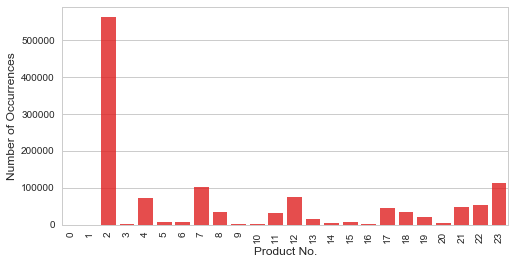

In [104]:
target_counts = y_all.astype('float64').sum(axis=0)
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color='red')
plt.xlabel('Product No.', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [96]:
print indexes[0].value_counts()
print indexes[1].value_counts()
print indexes[2].value_counts()
print indexes[3].value_counts()
print indexes[4].value_counts()
print indexes[5].value_counts()
print indexes[6].value_counts()



23    490486
2     368004
12     36833
7      26754
4       6742
17       499
22       102
18        75
8         61
11        31
21        19
19         5
15         2
13         1
10         1
Name: 0, dtype: int64
12    343520
23    323324
4     130787
7     117907
17      9534
22      1926
18      1005
8        809
11       385
21       305
19        80
13        21
10         7
15         3
6          2
Name: 1, dtype: int64
12    405706
4     361597
7      67049
17     64250
22     14333
18      4666
8       3872
23      2690
21      2487
11      2135
19       522
13       187
15        55
10        48
6         17
14         1
Name: 2, dtype: int64
17    344657
4     288007
7     140395
12     67502
22     48969
21     11252
18     10271
8       7813
11      7078
19      2161
13       862
15       280
10       181
23       100
6         79
14         7
5          1
Name: 3, dtype: int64
7     448818
17    229633
22     89037
4      69415
21     36995
18     18034
8      13311
11

In [105]:
print target_counts

0         78.0
1         16.0
2     561611.0
3        316.0
4      73061.0
5       7581.0
6       8097.0
7     100589.0
8      33271.0
9        317.0
10      1021.0
11     31217.0
12     75843.0
13     14687.0
14      4528.0
15      7359.0
16      1991.0
17     45499.0
18     34822.0
19     21426.0
20      2959.0
21     48304.0
22     52843.0
23    113015.0
dtype: float64


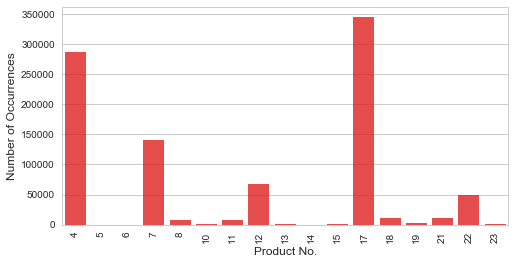

In [109]:
target_counts = indexes[3].value_counts()
#print(target_counts)
plt.figure(figsize=(8,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color='red')
plt.xlabel('Product No.', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()